# Chapter 3 Linear Regression

## Packt Publishing

In [1]:
# Import the required libraries

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('poverty.csv')

In [3]:
# A small sample of the data
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


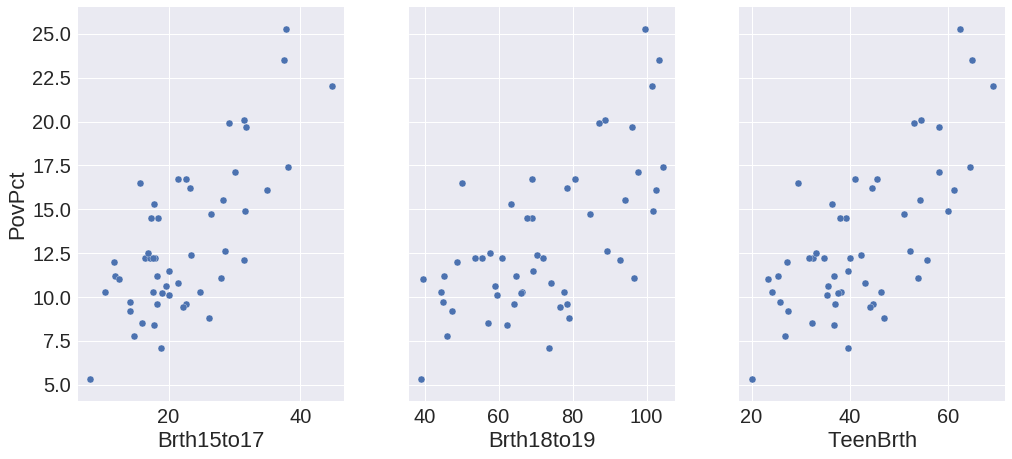

In [7]:
# Visualizing the relationship between the desired feature and target
sns.set(font_scale=2)  
sns.pairplot(df, x_vars=['Brth15to17','Brth18to19','TeenBrth'], y_vars='PovPct', size=7, aspect=0.7)

### Regression features to target mapping
The overall goal is to fit the target to a given feature and with intercept. Shown below are samples of what we are trying to achieve for 3 different features -  Brth15to17, Brth18to19 and TeenBrth and with PovPct as the target. The demo shown uses the regression functionality of seaborn for showing the line being fit. For running experiments, sklearn should be used to better grasp the mapping

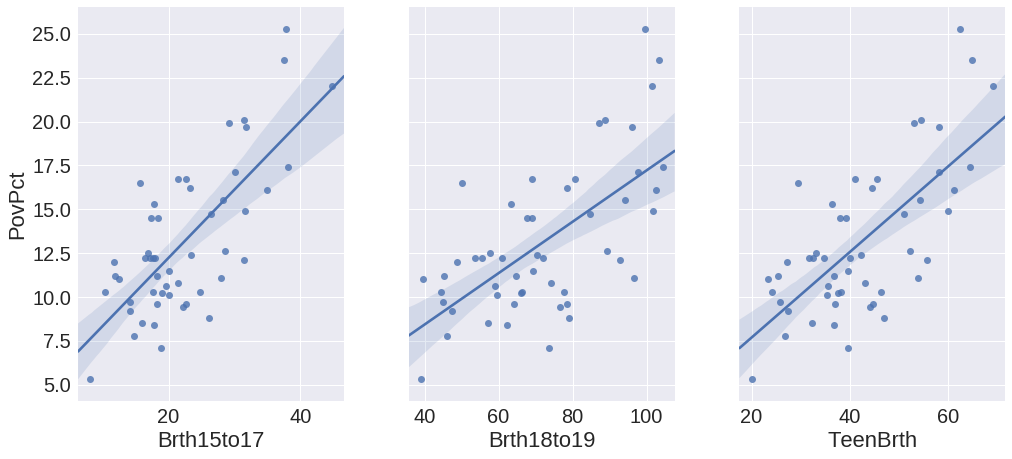

In [8]:
# Visualizing the relationship between the desired feature and target
sns.pairplot(df, x_vars=['Brth15to17','Brth18to19','TeenBrth'], y_vars='PovPct', size=7, aspect=0.7,kind='reg')

In [12]:
model = LinearRegression(fit_intercept=True)
model.fit(df[['Brth15to17']], df[['PovPct']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print('Coefficient: %f'%(model.coef_))
print('Intercept: %f'%(model.intercept_))

Coefficient: 0.388342
Intercept: 4.464469


In [14]:
preds = model.predict(df['Brth15to17'].sort_values().reshape(-1,1))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


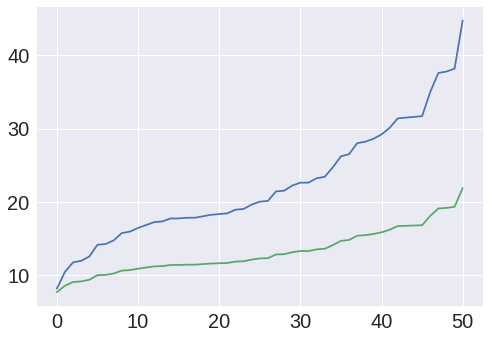

In [15]:
plt.plot(df['Brth15to17'].sort_values().reshape(-1,1))
plt.plot(preds)

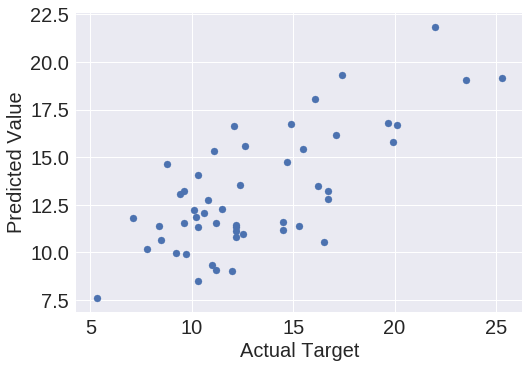

In [20]:
plt.scatter(df[['PovPct']], model.predict(df[['Brth15to17']]))
plt.xlabel('Actual Target', fontsize=20)
plt.ylabel('Predicted Value', fontsize=20)